In [1]:
#basic imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy
%matplotlib inline

In [2]:
train=pd.read_csv("cleaned_train.csv")
test=pd.read_csv("cleaned_test.csv")

In [3]:
train.columns

Index(['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Admission_Deposit',
       'updated_stay', 'updated_age'],
      dtype='object')

### Let's Understand the data

<AxesSubplot:>

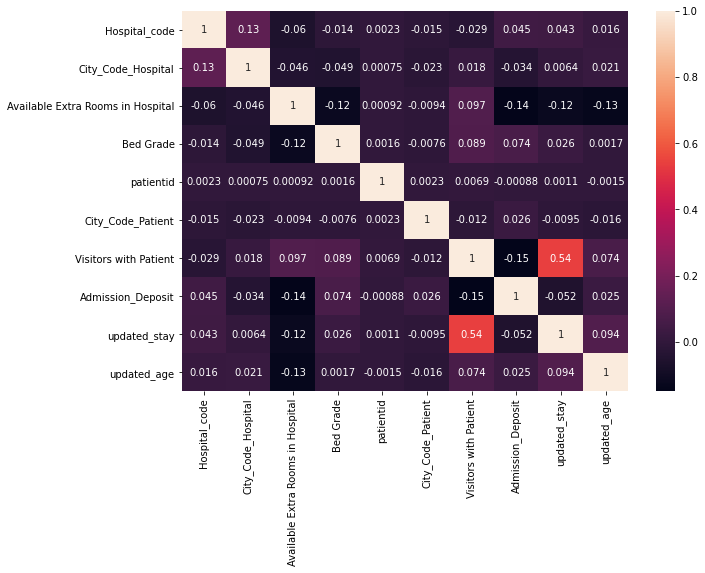

In [4]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),annot=True)

We can see here that if the stay of the patient increases then the visitors with patient also increases.
Let's look into it briefly

<AxesSubplot:xlabel='Visitors with Patient', ylabel='updated_stay'>

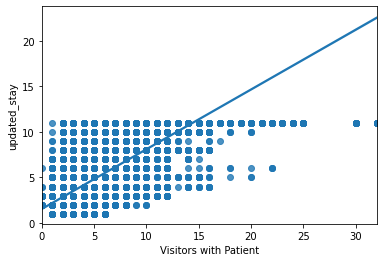

In [5]:
sns.regplot(train['Visitors with Patient'],train.updated_stay)

In [6]:
#From the above we can see a positive slope which is nothing but the positive correlation
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Admission_Deposit,updated_stay,updated_age
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,4911.0,1,6
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,5954.0,5,6
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,4745.0,4,6
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,7272.0,5,6
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,5558.0,5,6


In [7]:
train.groupby(by="Type of Admission")["Severity of Illness"].value_counts()

Type of Admission  Severity of Illness
Emergency          Moderate               62476
                   Minor                  35356
                   Extreme                19844
Trauma             Moderate               86624
                   Minor                  36800
                   Extreme                28837
Urgent             Moderate               26743
                   Minor                  13716
                   Extreme                 8042
Name: Severity of Illness, dtype: int64

In [10]:
train.groupby(by="Severity of Illness")["updated_age"].agg("count")

Severity of Illness
Extreme      56723
Minor        85872
Moderate    175843
Name: updated_age, dtype: int64

In [19]:
illness_with_age=train.groupby(by="updated_age")["Severity of Illness"].value_counts()
illness_with_age

updated_age  Severity of Illness
1            Moderate                3066
             Minor                   2530
             Extreme                  658
2            Minor                   8027
             Moderate                7383
             Extreme                 1358
3            Moderate               21200
             Minor                  15406
             Extreme                 4237
4            Moderate               36958
             Minor                  16462
             Extreme                10219
5            Moderate               37423
             Extreme                13393
             Minor                  12933
6            Moderate               27534
             Minor                  10513
             Extreme                10467
7            Moderate               18273
             Minor                   8199
             Extreme                 7215
8            Moderate               19068
             Minor                   9686
 

In [20]:
#Age_dict={'51-60':6, '71-80':8, '31-40':4, '41-50':5, '81-90':9, '61-70':7, '21-30':3,'11-20':2 , '0-10':1, '91-100':10}
#actual_age={value:key for (key,value) in Age_dict.items()}

In [22]:
illness_with_age.reset_index(name="count").sort_values(by="count",ascending=False)

,updated_age,Severity of Illness,count
12,5,Moderate,37423
9,4,Moderate,36958
15,6,Moderate,27534
6,3,Moderate,21200
21,8,Moderate,19068
18,7,Moderate,18273
10,4,Minor,16462
7,3,Minor,15406
13,5,Extreme,13393
14,5,Minor,12933


In [24]:
train.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Admission_Deposit,updated_stay,updated_age
0,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,4911.0,1,6
1,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,5954.0,5,6
2,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,4745.0,4,6
3,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,7272.0,5,6
4,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,5558.0,5,6


In [31]:
object_val=[x for x in train.columns if train[x].dtype=="O"]
numerical_val=[x for x in train.columns if x not in object_val]

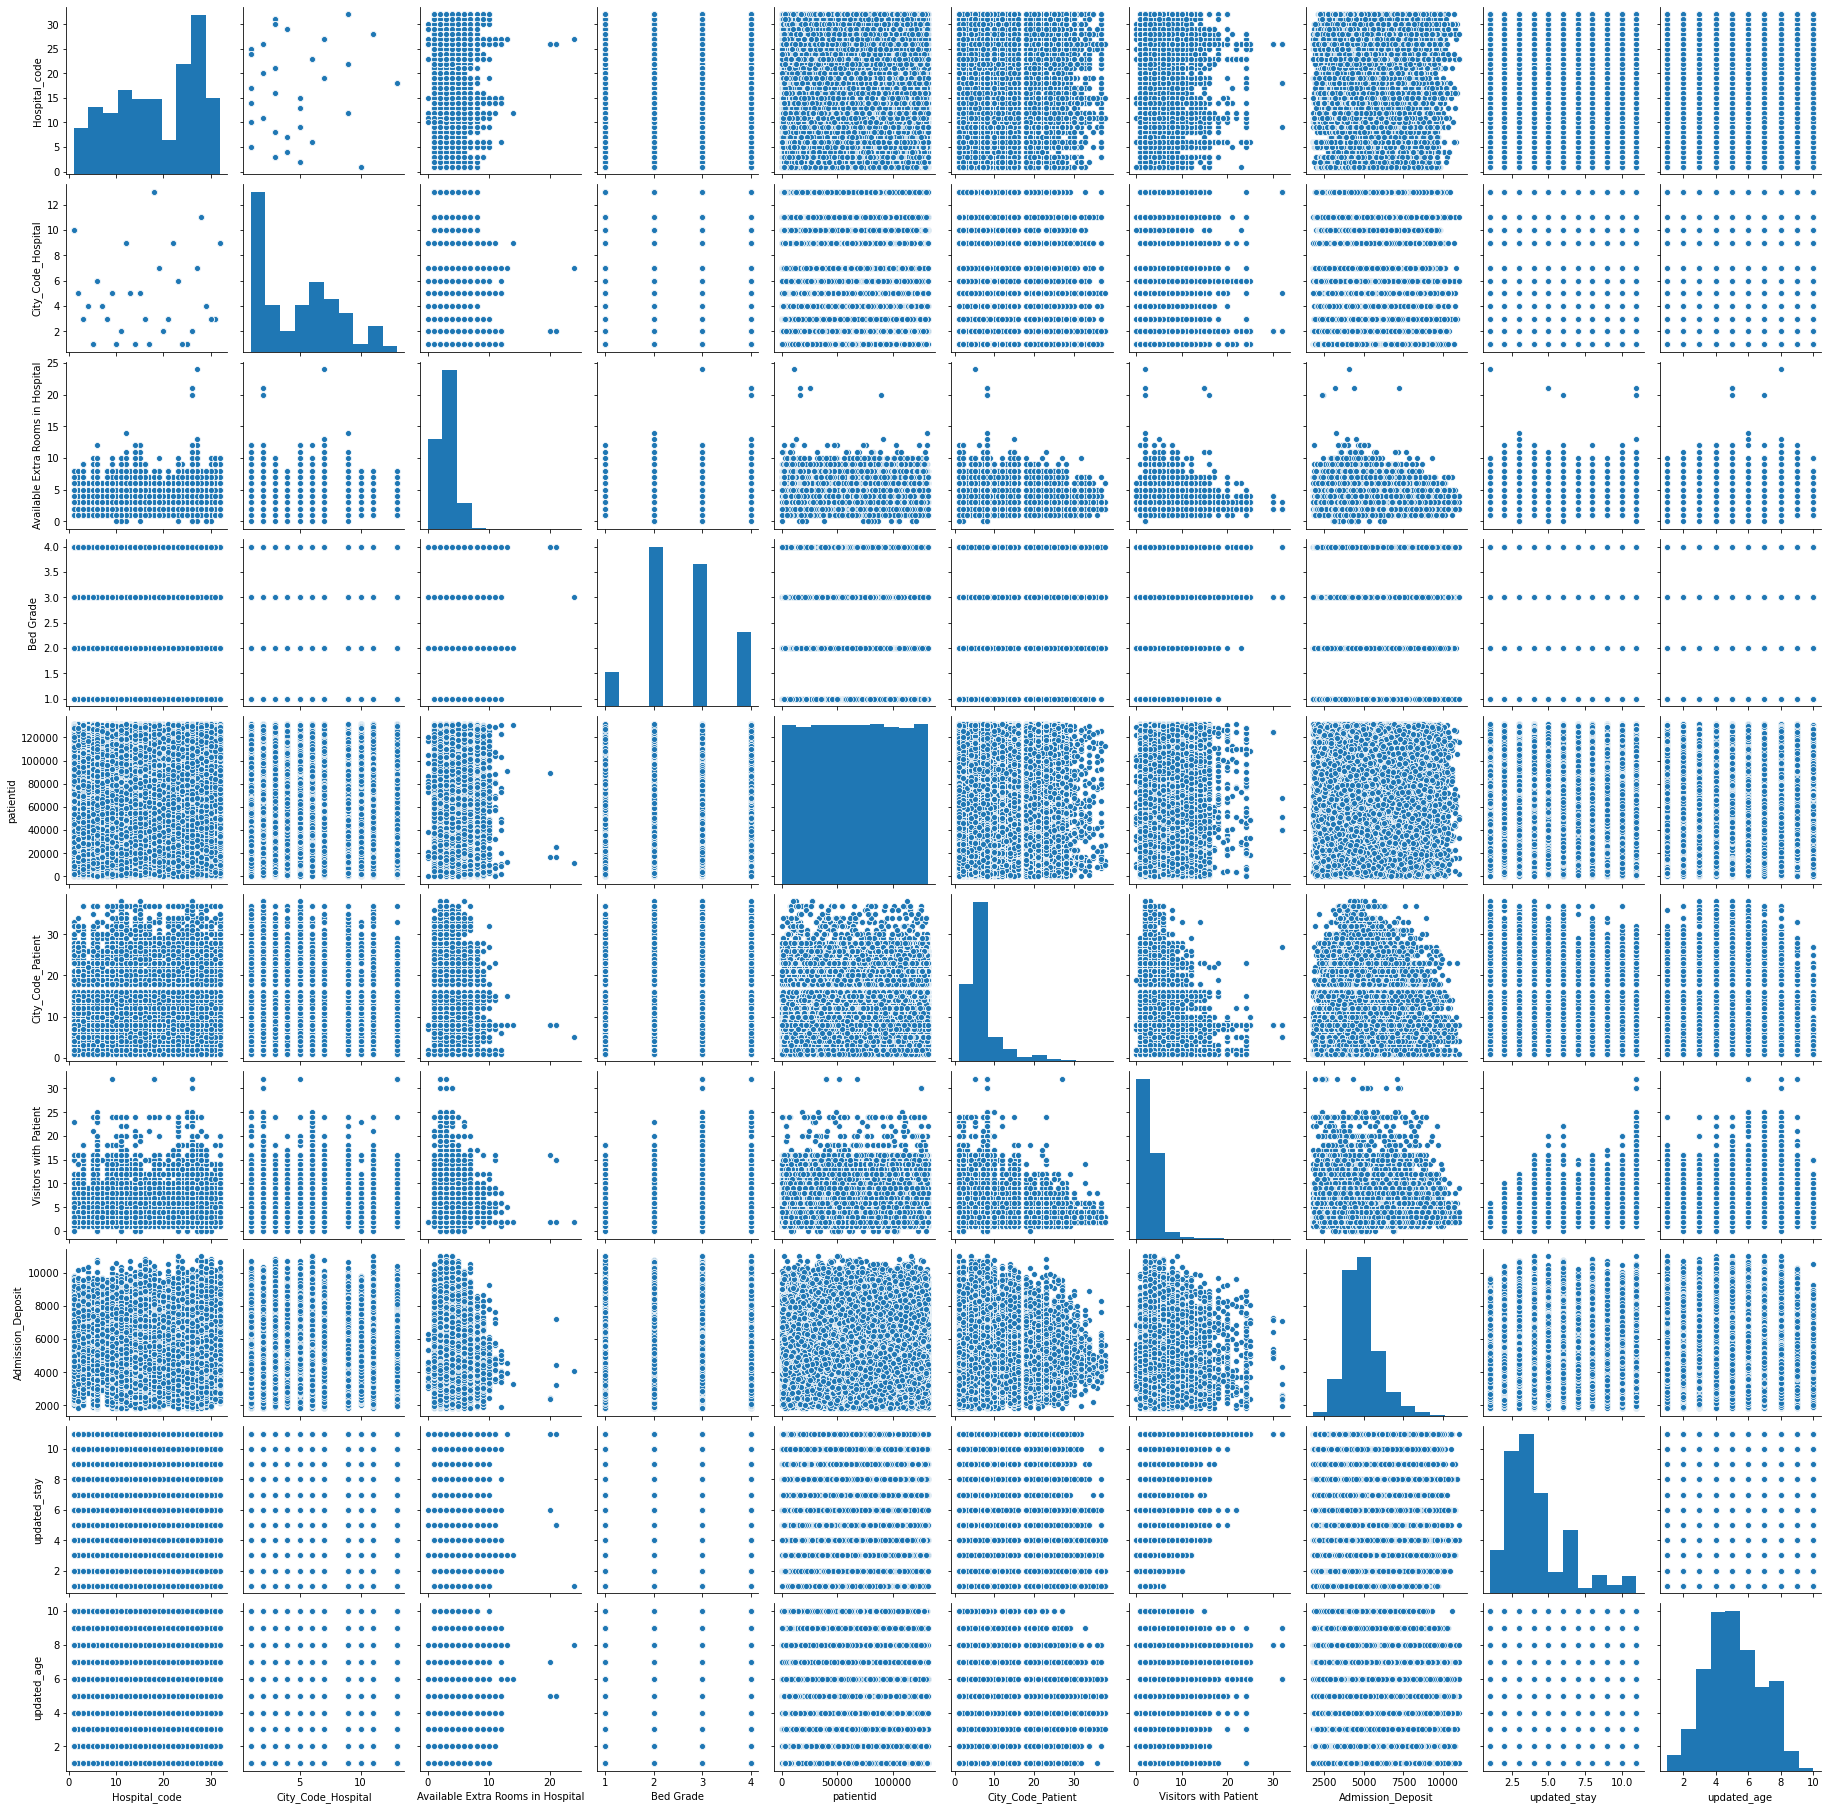

In [33]:
sns.pairplot(train[numerical_val])

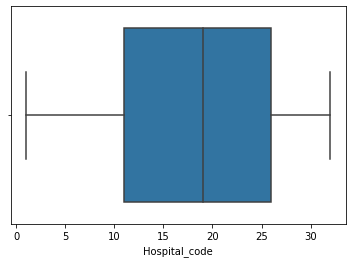

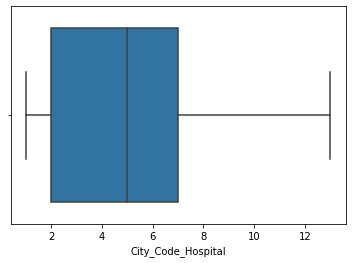

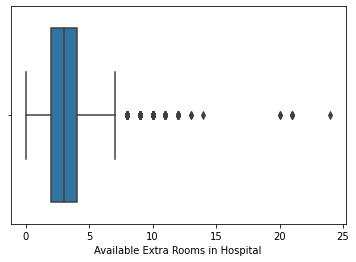

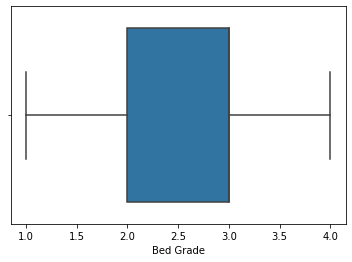

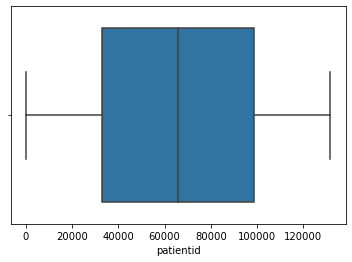

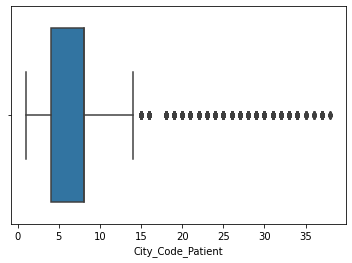

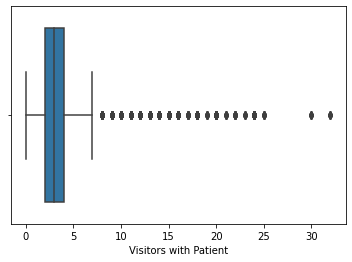

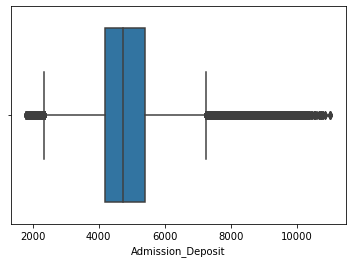

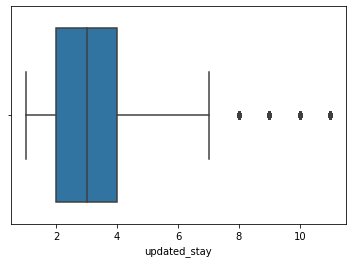

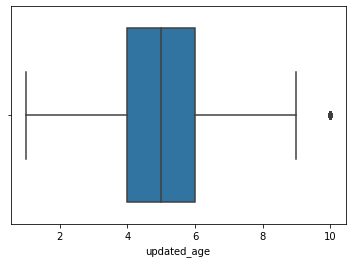

In [35]:
for i in numerical_val:
    sns.boxplot(train[i])
    plt.show()

## to be continued...